In [9]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#### **LinearRegression Class : sklearn**

In [61]:
dataset = load_diabetes(as_frame = True)
df = dataset['data'].loc[:, ['s1',	's2', 's3', 's4', 's5']]
df['target'] = dataset['target']
df.head()

,s1,s2,s3,s4,s5,target
0,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,151.0
1,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,75.0
2,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,141.0
3,0.012191,0.024991,-0.036038,0.034309,0.022688,206.0
4,0.003935,0.015596,0.008142,-0.002592,-0.031988,135.0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   s1      442 non-null    float64
 1   s2      442 non-null    float64
 2   s3      442 non-null    float64
 3   s4      442 non-null    float64
 4   s5      442 non-null    float64
 5   target  442 non-null    float64
dtypes: float64(6)
memory usage: 20.8 KB


#### Plotting pairplots to find the linear relationship between inputs and output

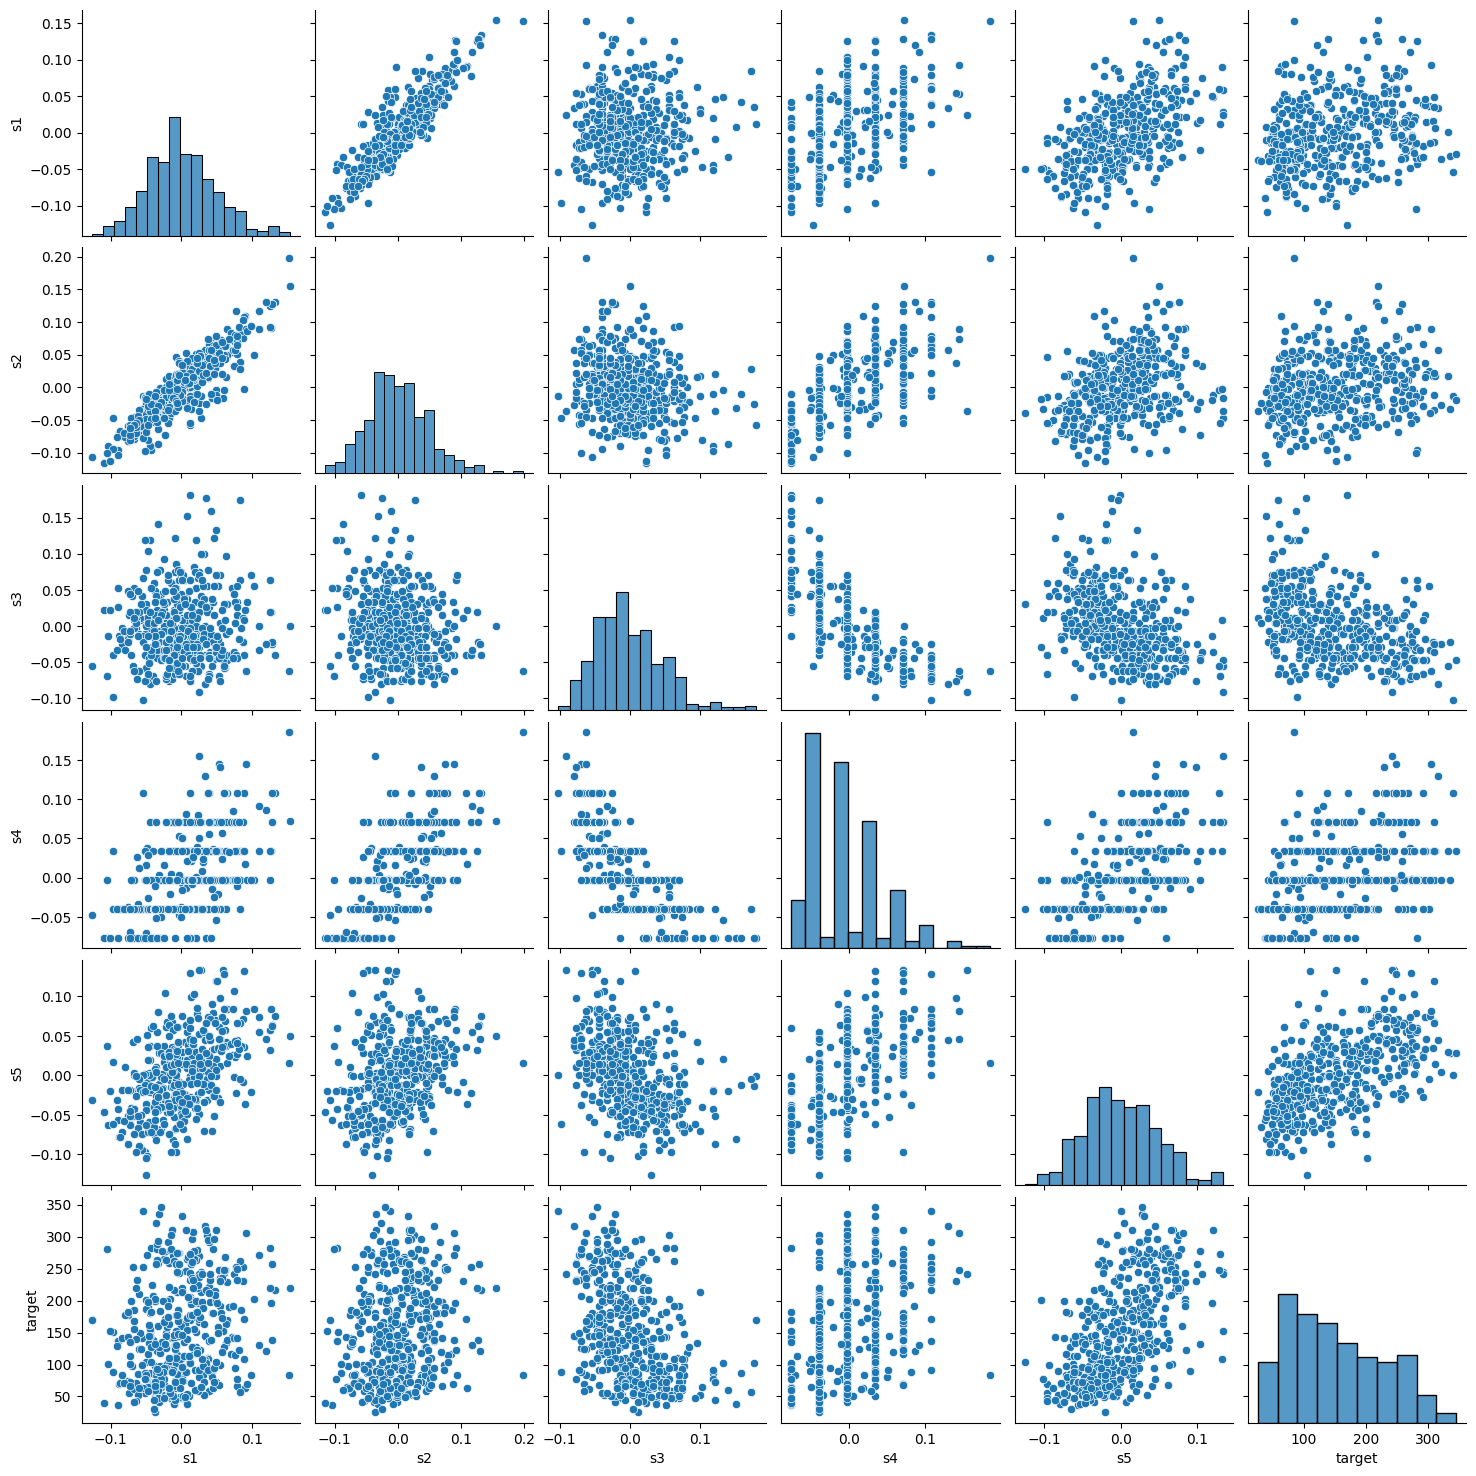

In [64]:
sns.pairplot(df)
plt.show()

#### S5(input) and target(output) columns have sort of linear relationship

In [48]:
X = np.array(df['s5']).reshape(-1, 1)
y = np.array(df['target'])

#### Splitting training and testing data

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

#### Model Training

In [51]:
lr = LinearRegression()

In [52]:
lr.fit(X_train, y_train)

LinearRegression()

#### Values of Slope and Intercept

In [53]:
print(lr.coef_)
print(lr.intercept_)

[945.61313607]
150.73681754198003


#### Plotting a Best Fit Line

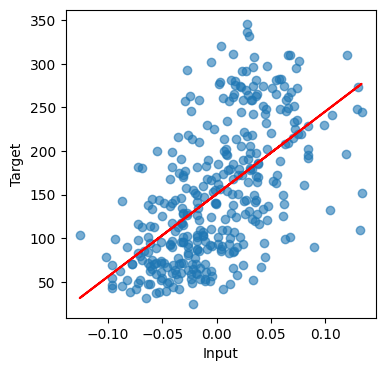

In [67]:
plt.figure(figsize = (4,4))
plt.scatter(X_train, y_train, alpha = 0.6)
plt.plot(X_train, lr.coef_[0] * X_train + lr.intercept_, color = 'red')
plt.xlabel('Input')
plt.ylabel('Target')
plt.show()

#### Model Prediction and calculating accuracy (r2_score)

In [56]:
y_pred = lr.predict(X_test)

In [58]:
r2_score(y_test, y_pred)

0.22527786743609446

#### **Creating our own Simple Linear Regression Class**

Using Ordinary Least Square Estimation

In [77]:
class simple_linear_regression:
    def __init__(self) -> None:
        self.m = None
        self.b = None

    def fit(self, X_train, y_train):
        X_train = X_train.ravel()
        # slope(m) calculation - OLS
        self.m = ((X_train - X_train.mean()) * (y_train - y_train.mean())).sum() / ((X_train - X_train.mean()) ** 2).sum()

        # y-intercept(b) calculation - OLS
        self.b = y_train.mean() - (self.m * X_train.mean())

    def predict(self, X_test):
        predicted_values = (self.m * X_test) + self.b
        return predicted_values

In [78]:
# Object Creation
slr = simple_linear_regression()

In [79]:
slr.fit(X_train, y_train)

#### Slope and Intercept

In [80]:
print(slr.m)
print(slr.b)

945.6131360690342
150.73681754198003


In [82]:
y_pred = slr.predict(X_test)

#### Regression Metrics
- mean_absolute_error
- mean_squared_error
- root_mean_squared_error
- r2_score
- adjusted_r2_score

In [83]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [90]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (((1 - r2) * (y_test.shape[0] - 1)) / (y_test.shape[0] - 1 - 1))

print(mae, mse, rmse, r2, adj_r2, sep = '\n')

53.71025663153764
4280.466050093035
65.4252707299942
0.22527786743609446
0.21637301533765885


#### **Simple Linear Regression using Gradient Descent**

In [170]:
class GDRegressor:
    def __init__(self, lr, epochs):
        self.coef_ = None
        self.intercept_ = None

        # Hyperparameters
        self.lr = lr
        self.epochs = epochs
    
    def fit(self, X_train, y_train):
        X_train = X_train.ravel()
        # Generally the random values of m(coef) and b(intercept) are
        self.coef_ = 1
        self.intercept_ = 0

        for i in range(self.epochs):
            y_hat = (self.coef_ * X_train + self.intercept_)

            # Calculating intercept
            intercept_der = -2 * np.sum(y_train - y_hat)
            self.intercept_ = self.intercept_ - (self.lr * intercept_der)

            # Calculating slopes
            coef_der = -2 * np.sum((y_train - y_hat) * X_train)
            self.coef_ = self.coef_ - (self.lr * coef_der)
    
    def predict(self, X_test):
        return self.coef_ * X_test + self.intercept_

##### The Learning Rate and No. of Epochs are Hyperparameters, so you need to tune them in order to increase the accuracy of model

In [237]:
gdr = GDRegressor(0.002, 3000)

In [238]:
gdr.fit(X_train, y_train)

#### Slope and Intercept

In [246]:
print(gdr.coef_)
print(gdr.intercept_)

945.5554394526547
150.73680054740026


#### Model Prediction and r2_score

In [248]:
y_pred = gdr.predict(X_test)

In [249]:
r2_score(y_test, y_pred)

0.22528474034213408